In [1]:
import numpy as np
import pandas as pd
from math import *
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import pickle as pk


In [10]:
a= pd.read_csv('result/res_50_aaa.csv',header=None)
a= np.array(a,dtype=int)
sum=0
acc = 0
for i in range(len(a)):
    acc+=a[i][i]
    for j in range(len(a[0])):
        sum+=a[i][j]
        
print(a)
print(sum)
print(acc)
print(acc/sum)

[[ 188    2    3    3    0    0    0    0    0    0    0    1]
 [   5   69    0    1    0    0    0    0    0    0    0    0]
 [   1    0  930    6    0    0    0    0    0    0    0    2]
 [   1    0    2 1478    0    0    0    0    0    0    0    2]
 [   0    0    0    0  193    0    0    0    0    0    0    0]
 [   0    0    0    0    0  140    0    3    0    0    2    0]
 [   0    0    0    0    0    0   52    0    0    0    0    0]
 [   0    0    0    0    0    3    0  295    0    0    2    0]
 [   0    0    0    0    0    0    0    0  268    0    2    0]
 [   0    0    0    0    0    1    1    0    0  358    0    0]
 [   0    0    0    0    0    3    0    0    8    0  343    0]
 [   2    0    4    4    0    0    0    0    0    0    0 1225]]
5603
5539
0.9885775477422809


In [11]:
#rec = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
#pre = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
#f1 = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
#name = ['vpnchat','vpnmail','vpnfile','vpnstream','vpnvoip','vpnp2p','chat','mail','file','stream','voip']

rec = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
pre = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
f1 = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
name = ['Chat','Email','File Transfer','Streaming','Torrent','VPN: Chat','VPN: Email','VPN: File Transfer','VPN: Streaming','VPN: Torrent','VPN: VoIP','VoIP', 'Average' ]
for i in range(12):
    tmp=0.0
    tmp2=0.0
    for j in range(12):
        if(i==j):
            tmp+=a[i][i]
        
        tmp2+=a[i][j]
    rec[i] = tmp/tmp2
    rec[12] += rec[i]

    
    
for i in range(12):
    tmp=0.0
    tmp2=0.0
    for j in range(12):
        if(i==j):
            tmp+=a[i][i]
        
        tmp2+=a[j][i]
    pre[i] = tmp/tmp2
    pre[12] += pre[i]

    
for i in range(12):
    f1[i] = 2*pre[i]*rec[i]/(pre[i]+rec[i])
    f1[12] += f1[i]


rec[12] = rec[12]/12
pre[12] = pre[12]/12
f1[12] = f1[12]/12

for i in range(13):
    print(name[i] ,':' ,rec[i] , ',' , pre[i] , ',' , f1[i])

Chat : 0.9543147208121827 , 0.9543147208121827 , 0.9543147208121827
Email : 0.92 , 0.971830985915493 , 0.9452054794520549
File Transfer : 0.9904153354632588 , 0.9904153354632588 , 0.9904153354632588
Streaming : 0.9966284558327714 , 0.9906166219839142 , 0.9936134453781512
Torrent : 1.0 , 1.0 , 1.0
VPN: Chat : 0.9655172413793104 , 0.9523809523809523 , 0.9589041095890412
VPN: Email : 1.0 , 0.9811320754716981 , 0.9904761904761905
VPN: File Transfer : 0.9833333333333333 , 0.9899328859060402 , 0.9866220735785953
VPN: Streaming : 0.9925925925925926 , 0.9710144927536232 , 0.9816849816849818
VPN: Torrent : 0.9944444444444445 , 1.0 , 0.9972144846796658
VPN: VoIP : 0.9689265536723164 , 0.9828080229226361 , 0.9758179231863443
VoIP : 0.9919028340080972 , 0.9959349593495935 , 0.9939148073022313
Average : 0.9798396259615255 , 0.9816984210799494 , 0.9806819626335582


In [4]:
rec = [0.0,0.0]
pre = [0.0,0.0]
f1 = [0.0,0.0]
name = ['nonVPN' , 'VPN' ]
for i in range(2):
    tmp=0.0
    tmp2=0.0
    for j in range(2):
        if(i==j):
            tmp+=a[i][i]
        
        tmp2+=a[i][j]
    rec[i] = tmp/tmp2

    
    
for i in range(2):
    tmp=0.0
    tmp2=0.0
    for j in range(2):
        if(i==j):
            tmp+=a[i][i]
        
        tmp2+=a[j][i]
    pre[i] = tmp/tmp2

    
for i in range(2):
    f1[i] = 2*pre[i]*rec[i]/(pre[i]+rec[i])



for i in range(2):
    print(name[i] ,':' ,rec[i] , ',' , pre[i] , ',' , f1[i])

nonVPN : 0.9948453608247423 , 0.9846938775510204 , 0.9897435897435899
VPN : 0.9594594594594594 , 0.9861111111111112 , 0.9726027397260274


In [12]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[9.54314721e-01 1.01522843e-02 1.52284264e-02 1.52284264e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 5.07614213e-03]
 [6.66666667e-02 9.20000000e-01 0.00000000e+00 1.33333333e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.06496273e-03 0.00000000e+00 9.90415335e-01 6.38977636e-03
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 2.12992545e-03]
 [6.74308833e-04 0.00000000e+00 1.34861767e-03 9.96628456e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.34861767e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.000

<Figure size 432x288 with 0 Axes>

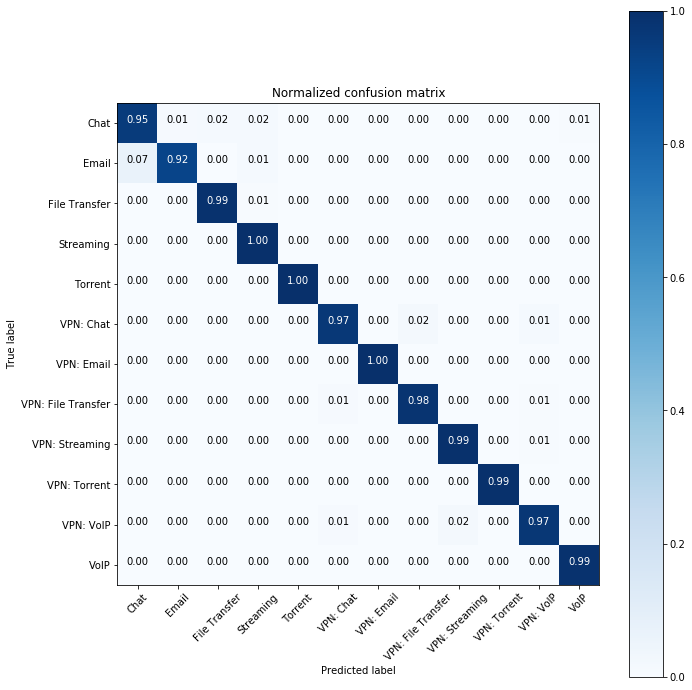

In [13]:
class_names =['Chat','Email','File Transfer','Streaming','Torrent','VPN: Chat','VPN: Email','VPN: File Transfer','VPN: Streaming','VPN: Torrent','VPN: VoIP','VoIP' ]
#class_names = ['nonVPN' , 'VPN']
#class_names = ['nonTOR' , 'TOR']
plt.figure()
plt.figure(figsize=(10,10))
plot_confusion_matrix(a, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')


plt.show()

In [7]:
def load(filename):
    with open(filename, 'rb') as f:
        data = pk.load(f)
    return data
trainh = load('result/train_his_res_50_arg.pickle')
testh = load('result/test_his_res_50_arg.pickle')

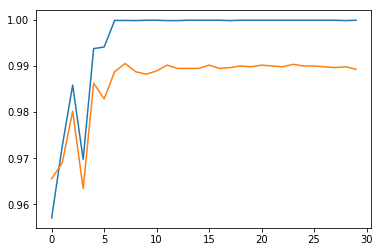

In [8]:
plt.plot(trainh)
plt.plot(testh)
plt.show()